In [1]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import pandas as pd

df = pd.read_csv("/content/UNBER-1k.csv")
df

,reel_id,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,Safe,NaN
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reel_id       1117 non-null   object
 1   UnsafeType    1117 non-null   object
 2   Visual texts  739 non-null    object
dtypes: object(3)
memory usage: 26.3+ KB


In [6]:
df['Visual texts'] = df['Visual texts'].fillna("কোন টেক্সট পাওয়া যায়নি")
df

,reel_id,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,Safe,কোন টেক্সট পাওয়া যায়নি
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।"


In [7]:
import requests

url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.txt"
response = requests.get(url)
bengali_stopwords = response.text.splitlines()

print("Total Bengali Stopwords:", len(bengali_stopwords))

Total Bengali Stopwords: 398


In [8]:
banglish_stopwords = [
    "ami", "tumi", "she", "amra", "tomra", "tara", "kono", "onek", "kichu",
    "kintu", "shudhu", "jeta", "ki", "keno", "kothay", "jokhon", "tokhon",
    "abar", "ekhane", "othoba", "ba", "keu", "jodi", "achhe", "niye", "jeta", "hoye", "jay", "ache", "ar", "korle", "ja",
    "na", "ei", "eta", "shei", "nah"
]

In [9]:
combined_stopwords = set(bengali_stopwords + banglish_stopwords)

print("Total Combined Stopwords:", len(combined_stopwords))

Total Combined Stopwords: 434


In [10]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\u0980-\u09FF ]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    bengali_stopwords = combined_stopwords
    stop_words.update(bengali_stopwords)
    words = [word for word in words if word.lower() not in stop_words and len(word) > 1]

    return words

In [11]:
df['cleaned_text'] = df['Visual texts'].apply(clean_text)
df

,reel_id,UnsafeType,Visual texts,cleaned_text
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie,"[way, watch, Oppenheimer, Berbie]"
1,www.facebook.com/reel/1006146964533997,Safe,কোন টেক্সট পাওয়া যায়নি,"[টেক্সট, পাওয়া, যায়নি]"
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,"[বান্ধবী, লাগানির, পিনিকে, Love, love]"
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,"[প্রত্যেকটা, অফিসে, একজন, কলিগ, থাকবেই, Laptop]"
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,"[হ্যালো, শার্ক, ট্যাঙ্ক, বাংলাদেশ, এম, কামিং]"
...,...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না,"[কথা, বাকি, হয়তো, কোনদিনও]"
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...,"[তোমাকে, মন, দিয়ে, ভালোবাসতাম, উপহার, অবহেলা, ..."
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।,"[ওগো, শুনছো, একথা, মানুষটা, কারোর]"
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।","[মন, দিয়ে, ভালোবাসতে, গেলাম, অবশেষে, ধোকা, পেলাম]"


In [12]:
word_frequencies = {}

# Iterate through the cleaned text and update frequencies
for index, row in df.iterrows():
    for word in row['cleaned_text']:
      word = word.lower()
      if word in word_frequencies:
          word_frequencies[word] += 1
      else:
          word_frequencies[word] = 1

In [13]:
sorted_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

In [14]:
cnt = 0

for word, frequency in sorted_frequencies.items():
    print(f'{word}: {frequency}')
    cnt += 1
    if cnt == 5:
        break

পাওয়া: 382
যায়নি: 380
টেক্সট: 378
কথা: 68
ভাই: 53


In [15]:
df['UnsafeType'].value_counts()

,count
UnsafeType,
Safe,442
Adult,329
Harmful,221
Suicidal,125


In [16]:
import random

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [17]:
df

,reel_id,UnsafeType,Visual texts,cleaned_text
0,www.facebook.com/reel/940909878048735,Safe,"যাদের কথা আঘাত আমার রূহ পর্যন্ত পৌঁছে গেছে, তা...","[কথা, আঘাত, রূহ, পৌঁছে, সুখ, দেখার, বেঁচে, থাকতে]"
1,www.facebook.com/reel/1163896471253100,Safe,তোমার ভাই আমার ভাই মোরসালিন ভাই মোরসালিন ভাই,"[ভাই, ভাই, মোরসালিন, ভাই, মোরসালিন, ভাই]"
2,www.facebook.com/reel/576193358306179,Adult,বন্ধকে সান্তনা দিতে এসে nura,"[বন্ধকে, সান্তনা, nura]"
3,www.facebook.com/reel/883356346297033,Harmful,ইফতার করার পর বন্ধু শয়তান,"[ইফতার, বন্ধু, শয়তান]"
4,www.facebook.com/reel/460478153542966,Suicidal,কল্পনারে স্বপ্ন সুন্দ্র বাস্তব এ না... পুরুষ ট...,"[কল্পনারে, স্বপ্ন, সুন্দ্র, বাস্তব, পুরুষ, টাক..."
...,...,...,...,...
1112,www.facebook.com/reel/551109851125442,Safe,The Talking Bro,"[Talking, Bro]"
1113,www.facebook.com/reel/1212912926591045,Safe,কোন টেক্সট পাওয়া যায়নি,"[টেক্সট, পাওয়া, যায়নি]"
1114,www.facebook.com/reel/1923545318061688,Suicidal,ব্যর্থ প্রেম - Feeling sad. অনেক ধন্যবাদ তোমাক...,"[ব্যর্থ, প্রেম, Feeling, sad, ধন্যবাদ, তোমাকে,..."
1115,www.facebook.com/reel/7617312368360921,Suicidal,তোমার জন্য আমি কেন্দে বেড়াতাম শেষ পর্যন্ত কান্...,"[কেন্দে, বেড়াতাম, শেষ, কান্দিয়ে, ছেড়ে, দিলে]"


## word2vec

In [18]:
tokenized_data = df['cleaned_text'].tolist()

In [19]:
import gensim
from gensim.models import Word2Vec

In [20]:
word2vec_model = Word2Vec(
    sentences=tokenized_data,
    vector_size=100,  # Embedding dimension
    window=7,         # Window size
    sg=1,             # Use skip-gram (1 for skip-gram, 0 for CBOW)
    min_count=1,      # Minimum word frequency
    workers=4         # Number of worker threads
)

In [21]:
word2vec_model.save("word2vec_model.model")

In [22]:
word2vec_model.wv['বয়স্ক']

array([-0.12109964,  0.16481905,  0.08684479, -0.04589684, -0.00257277,
       -0.19214775, -0.0157782 ,  0.2816266 , -0.10330216,  0.01713838,
       -0.14994118, -0.17229953, -0.00048447, -0.02431917,  0.02938303,
       -0.15841357, -0.03561391, -0.21052328,  0.06356566, -0.18720777,
        0.0313519 ,  0.03523052,  0.04167329, -0.01978908, -0.04678584,
        0.02395117, -0.1455449 , -0.11118075, -0.03971339, -0.13151847,
        0.13089487,  0.02819714, -0.00184227,  0.01530016,  0.06180393,
        0.1015524 ,  0.01940977, -0.0661505 , -0.06912744, -0.16426462,
        0.05923118, -0.16363916, -0.01983926,  0.01882536,  0.08950234,
       -0.12071436, -0.1419173 , -0.02804951, -0.02631303, -0.02987115,
        0.10376784, -0.10197058, -0.11318361,  0.06780467, -0.05775399,
        0.09920167,  0.15417998,  0.03634774, -0.09504966, -0.00399607,
        0.00447498,  0.03235437, -0.04333118,  0.08924318, -0.09092075,
        0.07049788, -0.00274189, -0.00492091, -0.09001083,  0.05

In [23]:
word2vec_model.wv['Chele']

array([-0.03137739,  0.04214591,  0.01121416, -0.00657141,  0.00840968,
       -0.043594  , -0.00214091,  0.06389394, -0.02281659, -0.00118477,
       -0.04210886, -0.0434298 , -0.01272886, -0.01477626,  0.01455359,
       -0.0403306 , -0.01359022, -0.05600384,  0.02624717, -0.03162313,
        0.00152634, -0.00266691,  0.0229317 ,  0.001167  , -0.00689948,
        0.00053899, -0.0253626 , -0.01787009, -0.00284451, -0.02865634,
        0.02912684,  0.01475192, -0.00166056, -0.0047759 ,  0.01843395,
        0.02363472,  0.00019524, -0.0098902 , -0.00907467, -0.03714026,
        0.00796814, -0.0402544 ,  0.00744356,  0.00385373,  0.0178466 ,
       -0.02402377, -0.02096482, -0.0144373 , -0.00489825, -0.0133366 ,
        0.02612564, -0.02214186, -0.01473179,  0.01819941, -0.01936111,
        0.01641747,  0.04266868,  0.0037347 , -0.01761883, -0.00369909,
       -0.00380067,  0.00808425, -0.01405617,  0.01448648, -0.01951584,
        0.0210246 , -0.00833869,  0.00937261, -0.02511876,  0.00

In [24]:
len(word2vec_model.wv.index_to_key)

4940

In [25]:
def get_sentence_embedding(sentence, model):
    tokens = [token for token in tokenized_data]
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    if embeddings:
        return sum(embeddings) / len(embeddings)  # Average embedding for the sentence
    else:
        return None

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = word2vec_model.vector_size

In [28]:
def text_to_sequence(text, word2vec_model):
    sequence = []
    for word in text.split():
        if word in word2vec_model.wv:
            sequence.append(word2vec_model.wv[word])
        else:
            sequence.append(np.zeros(EMBEDDING_DIM))
    return sequence

In [29]:
X = [text_to_sequence(text, word2vec_model) for text in df['Visual texts']]
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, dtype='float32', padding='post', truncating='post')

In [30]:
df['UnsafeType'], uniques = pd.factorize(df['UnsafeType'])
uniques

Index(['Safe', 'Adult', 'Harmful', 'Suicidal'], dtype='object')

In [31]:
y = df['UnsafeType']

In [32]:
y = np.array(y)

In [33]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.AdamW(learning_rate=3e-4, weight_decay=0.01), metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [38]:
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.3988 - loss: 11.7874 - val_accuracy: 0.4018 - val_loss: 10.0509
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4058 - loss: 9.5685 - val_accuracy: 0.4018 - val_loss: 8.2117
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3736 - loss: 7.8659 - val_accuracy: 0.4018 - val_loss: 6.7526
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3908 - loss: 6.4522 - val_accuracy: 0.4018 - val_loss: 5.5383
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4124 - loss: 5.3267 - val_accuracy: 0.4018 - val_loss: 4.6196
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3903 - loss: 4.4551 - val_accuracy: 0.4018 - val_loss: 3.8759
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3981 - loss: 3.7494 - val_accuracy: 0.4018 - val_loss: 3.2803
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3944 - loss: 3.2032 - val_accuracy: 0.4375 

In [39]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = y_test.flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step


In [40]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.40      0.52      0.45        44
           1       0.46      0.55      0.50        33
           2       0.00      0.00      0.00        22
           3       0.33      0.38      0.36        13

    accuracy                           0.41       112
   macro avg       0.30      0.36      0.33       112
weighted avg       0.33      0.41      0.37       112



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
classes = ['Safe', 'Adult', 'Harmful', 'Suicidal']

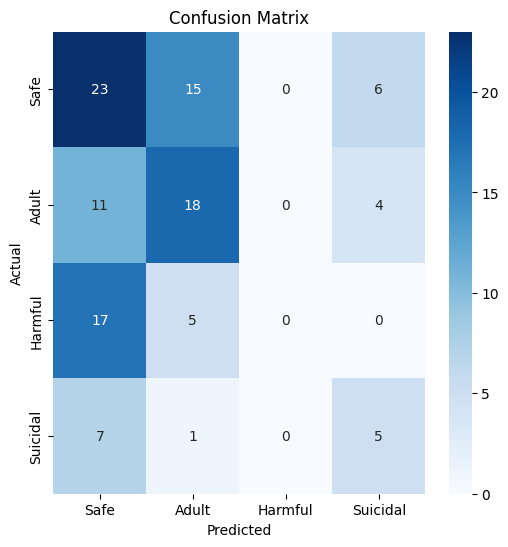

In [42]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()